In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 10
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.labelsize'] = 38
mpl.rcParams['ytick.labelsize'] = 38
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 30
import numpy as np

Figure 2 - Axon and Synapse Plots
--------------------------------------

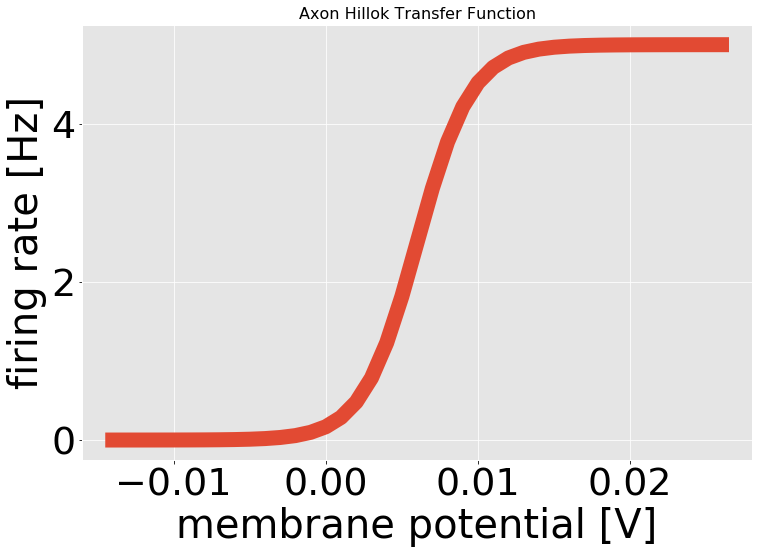

In [93]:
from core.axon import JansenRitAxon

axon = JansenRitAxon()

fig, axes = plt.subplots(figsize=(12,8))
axes = axon.plot_transfer_function(create_plot=False, axes=axes)

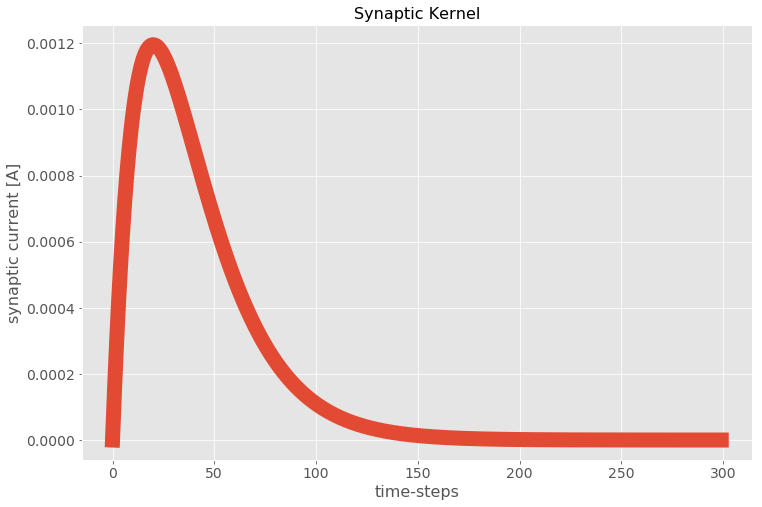

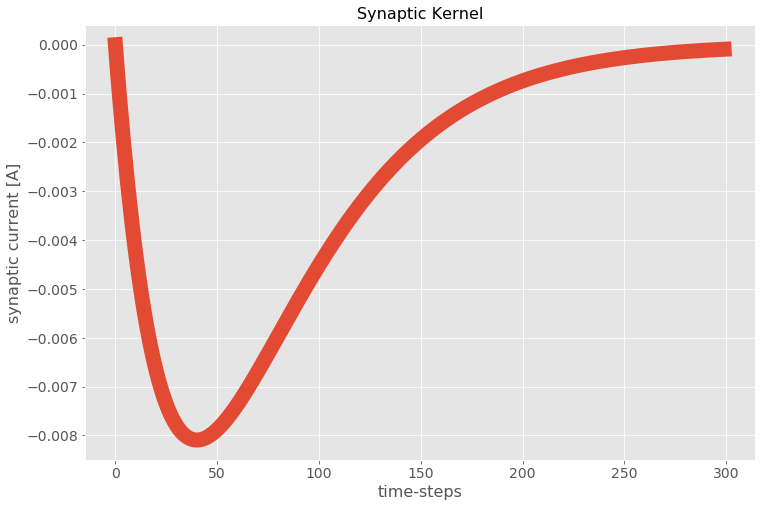

In [10]:
from core.synapse import JansenRitExcitatorySynapse, JansenRitInhibitorySynapse

synapse_e = JansenRitExcitatorySynapse(bin_size=5e-4, max_delay=0.15)
synapse_i = JansenRitInhibitorySynapse(bin_size=5e-4, max_delay=0.15)

fig, axes = plt.subplots(figsize=(12, 8))
axes = synapse_e.plot_synaptic_kernel(create_plot=False, axes=axes)
fig2, axes2 = plt.subplots(figsize=(12, 8))
axes2 = synapse_i.plot_synaptic_kernel(create_plot=False, axes=axes2)

Figure 3 - Jansen-Rit NMM Bifurcations
--------------------------------------------

In [74]:
from core.circuit import JansenRitCircuit

# circuit parameters
step_size = 1e-4
max_synaptic_delay = 1.0
init_states = np.zeros(3)

# simulation parameters
simulation_time = 10.
cutoff_time = 9.
simulation_steps = int(simulation_time / step_size)

# input
synaptic_input = np.zeros((simulation_steps, 3, 2))
extrinsic_current = np.zeros((simulation_steps, 3))
extrinsic_current[:, 0] = 2.7e-3

# base-line
jrc = JansenRitCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, init_states=init_states)
jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_current)

# increased input
extrinsic_current[:, 0] = 4e-3
jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_current)

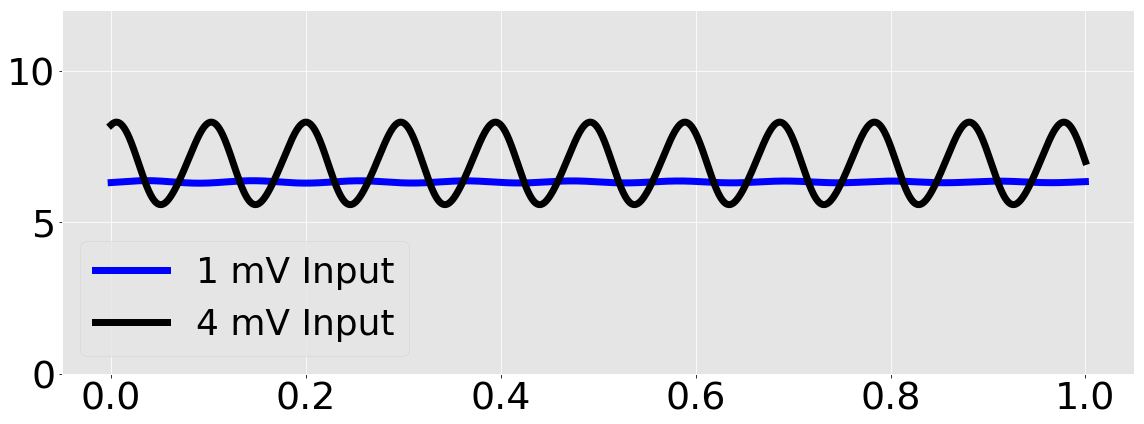

In [77]:
# plotting
fig, axes = plt.subplots(figsize=(16,6))
axes = jrc.plot_population_states([0], create_plot=False, axes=axes, time_window=[cutoff_time, simulation_time])
axes.get_lines()[0].set_color("red")
axes = jrc.plot_population_states([0], create_plot=False, axes=axes, time_window=[simulation_time + cutoff_time, 2* simulation_time])
axes.get_lines()[1].set_color("black")
axes.set_ylim([.0, .012])
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_xlabel('')
axes.set_yticklabels(['0', '5', '10'])
axes.set_ylabel('')
plt.legend(['2.7 mV Input', '4 mV Input'])

plt.tight_layout()

Figure 4 - Alternative Modeling Choices at Axon and Synapse
-------------------------------------------------------------------

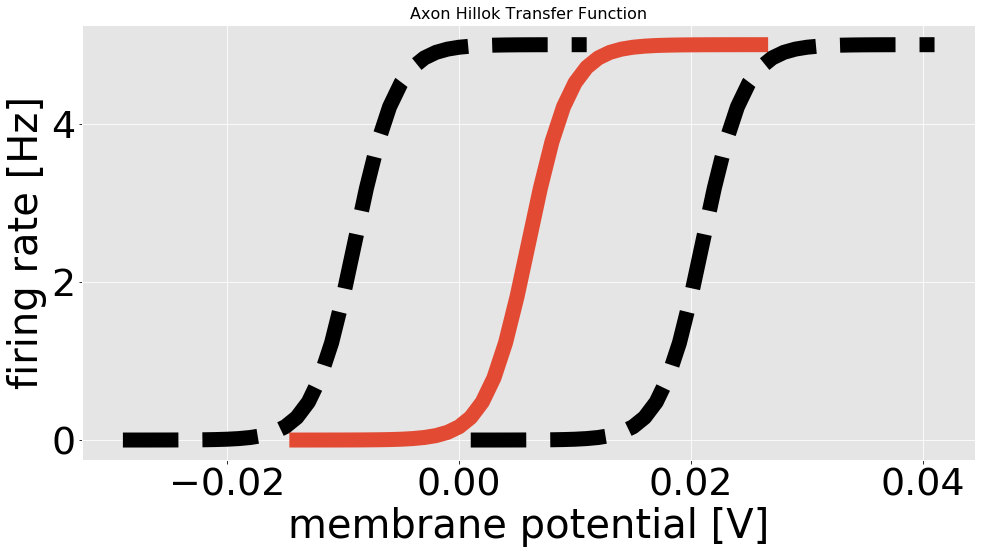

In [10]:
from core.axon import JansenRitAxon

membrane_potential_threshold = [-0.009, 0.021]
fig, axes = plt.subplots(figsize=(16,8))
axon = JansenRitAxon()
axes = axon.plot_transfer_function(create_plot=False, axes=axes)

for m in membrane_potential_threshold:
    axon.transfer_function_args['membrane_potential_threshold'] = m
    axes = axon.plot_transfer_function(create_plot=False, axes=axes)
    axes.get_lines()[-1].set_color("black")
    axes.get_lines()[-1].set_linestyle('--')

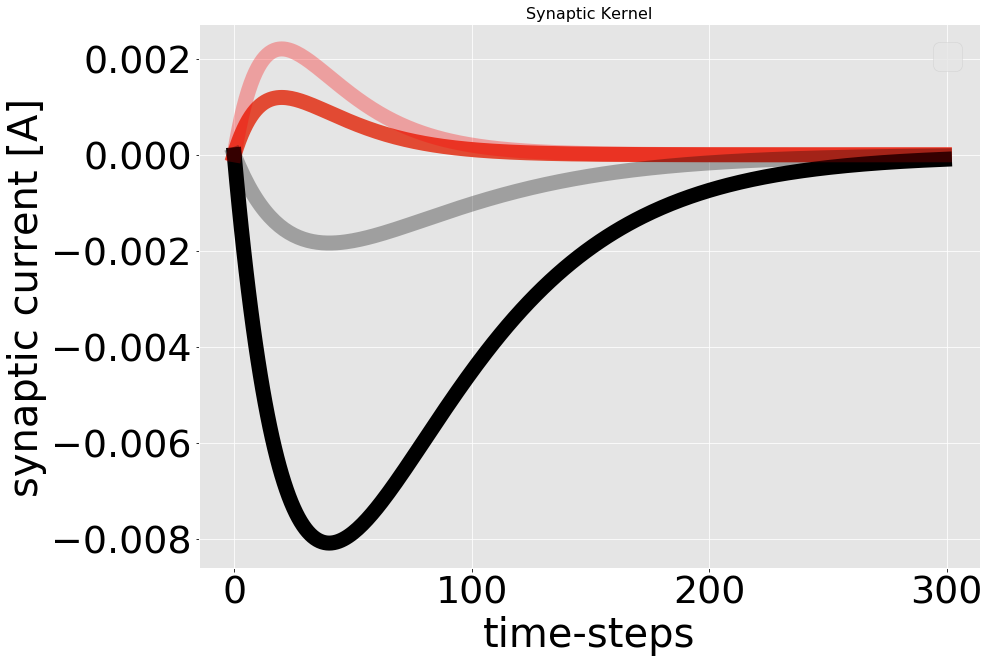

In [20]:
from core.population import JansenRitPyramidalCells

pcs = JansenRitPyramidalCells(max_synaptic_delay=0.15)
fig, axes = plt.subplots(figsize=(14,10))
axes = pcs.plot_synaptic_kernels(create_plot=False, axes=axes)
axes.get_lines()[1].set_color("black")
plt.legend('')

pcs.synapses[0].efficacy = 0.006
pcs.synapses[1].efficacy = -0.005
pcs.update()
axes = pcs.plot_synaptic_kernels(create_plot=False, axes=axes)
axes.get_lines()[2].set_color("red")
axes.get_lines()[2].set_alpha(0.3)
axes.get_lines()[3].set_color("black")
axes.get_lines()[3].set_alpha(0.3)
plt.legend('')

In [17]:
from core.circuit import JansenRitLeakyCapacitorCircuit

# set parameters

# general
N = 3                                               # PCs, EINs, IIns
n_synapses = 2                                      # excitatory and inhibitory
step_size = 1e-4
max_synaptic_delay = 0.5
synapse_params_e = {'tau_rise': 3e-4, 'tau_decay': 6e-3, 'efficacy': 1.273 * 3e-13}
synapse_params_i = {'tau_rise': 6e-4, 'rau_decay': 2e-2, 'efficacy': -1.273 * 1e-12}
synapse_params = [synapse_params_e, synapse_params_i]

# initialize circuits
jrc = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                                     synapse_params=synapse_params)
synapse_params[0]['tau_rise'] = 1e-20
synapse_params[1]['tau_rise'] = 1e-20
jrc_base = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, synapse_params=synapse_params)

# define simulation parameters
simulation_time = 1.
simulation_steps = int(simulation_time / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[2000:6000, 0, 0] = 22. * np.random.randn(4000) + 220.

# perform simulation
jrc.run(synaptic_input, simulation_time)
jrc_base.run(synaptic_input, simulation_time)

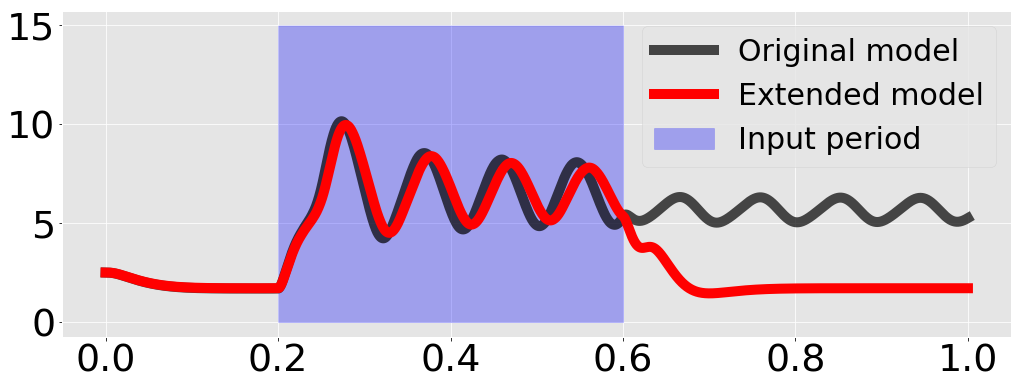

In [18]:
fig, axes = plt.subplots(figsize=(17,6))

axes = jrc_base.plot_population_states([0], create_plot=False, axes=axes)
axes = jrc.plot_population_states([0], create_plot=False, axes=axes)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.08, -0.05, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3)
axes.get_lines()[0].set_color("black")
axes.get_lines()[1].set_color("red")
axes.get_lines()[0].set_alpha(0.7)
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_yticklabels(['0', '0', '5', '10', '15'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend(['Original model', 'Extended model', 'Input period'])

In [11]:
from core.circuit import MoranCircuit

# set parameters
N = 4
n_synapses = 2
step_size = 1e-4
max_synaptic_delay = 0.9

# instantiate circuits
mc = MoranCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, tau=0.512)
mc_base = MoranCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, tau=None)

# define simulation parameters
simulation_time = 1.
simulation_steps = int(simulation_time / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[2000:6000, 2, 0] = 22. * np.random.randn(4000) + 220.

# perform simulation
mc.run(synaptic_input, simulation_time)
mc_base.run(synaptic_input, simulation_time)

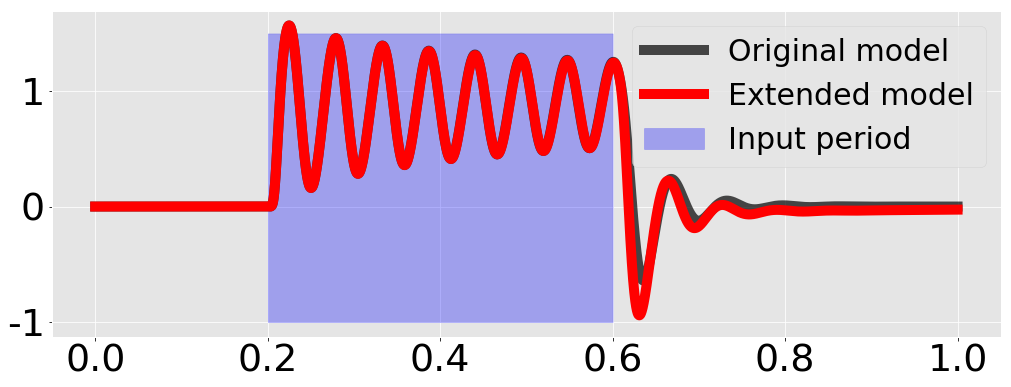

In [12]:
fig, axes = plt.subplots(figsize=(17,6))

axes = mc_base.plot_population_states([0], create_plot=False, axes=axes)
axes = mc.plot_population_states([0], create_plot=False, axes=axes)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.001, 0.0015, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3)
axes.get_lines()[0].set_color("black")
axes.get_lines()[1].set_color("red")
axes.get_lines()[0].set_alpha(0.7)
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_yticklabels(['-1', '-1', '0', '1'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend(['Original model', 'Extended model', 'Input period'])

In [9]:
from core.circuit import WangKnoescheCircuit

# set parameters
N = 5
n_synapses = 2
step_size = 1e-4
max_synaptic_delay = 0.9
tau_depression = 0.05
tau_recycle = 0.5
plastic_synapses = [True, False]

# instantiate circuits
wkc = WangKnoescheCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, tau_depression=tau_depression,
                          tau_recycle=tau_recycle, plastic_synapses=plastic_synapses)
wkc_base = WangKnoescheCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                               plastic_synapses=[False, False])

# define simulation parameters
simulation_time = 1.
simulation_steps = int(simulation_time / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[2000:6000, 2, 0] = 22. * np.random.randn(4000) + 220.

# perform simulation
wkc.run(synaptic_input, simulation_time)
wkc_base.run(synaptic_input, simulation_time)

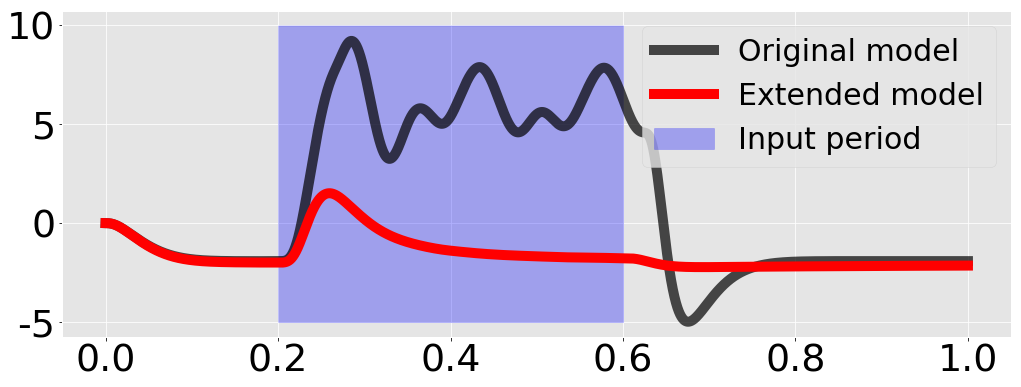

In [12]:
fig, axes = plt.subplots(figsize=(17,6))

axes = wkc_base.plot_population_states([0], create_plot=False, axes=axes)
axes = wkc.plot_population_states([0], create_plot=False, axes=axes)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.005, 0.01, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3)
axes.get_lines()[0].set_color("black")
axes.get_lines()[1].set_color("red")
axes.get_lines()[0].set_alpha(0.7)
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
axes.set_yticklabels(['-5', '-5', '0', '5', '10'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend(['Original model', 'Extended model', 'Input period'])

In [2]:
from core.circuit import JansenRitLeakyCapacitorCircuit

# define parameters
N = 3
n_synapses = 2
step_size = 1e-4
max_synaptic_delay = 0.9
conductance_based = True

# instantiate circuits
jrc = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                                     conductance_based=conductance_based, feedback_strength)
jrc_base = JansenRitLeakyCapacitorCircuit(step_size=step_size, max_synaptic_delay=max_synaptic_delay, 
                                          conductance_based=False)

# define simulation parameters
simulation_time = 1.
simulation_steps = int(simulation_time / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[2000:6000, 0, 0] = 22. * np.random.randn(4000) + 220.

# perform simulation
jrc.run(synaptic_input, simulation_time)
jrc_base.run(synaptic_input, simulation_time)

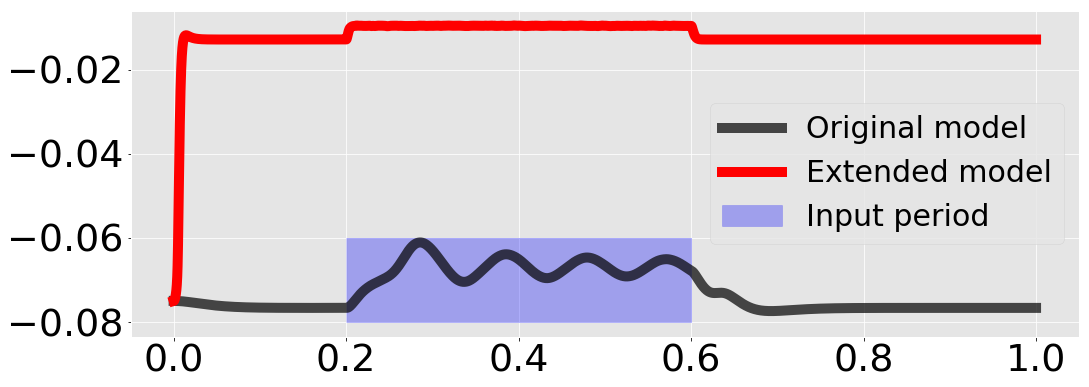

In [3]:
fig, axes = plt.subplots(figsize=(17,6))

axes = jrc_base.plot_population_states([0], create_plot=False, axes=axes)
axes = jrc.plot_population_states([0], create_plot=False, axes=axes)

steps = np.arange(0, simulation_steps+1)
axes.fill_between(steps, -0.08, -0.06, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3)
axes.get_lines()[0].set_color("black")
axes.get_lines()[1].set_color("red")
axes.get_lines()[0].set_alpha(0.7)
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
#axes.set_yticklabels(['-5', '-5', '0', '5', '10'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend(['Original model', 'Extended model', 'Input period'])

In [2]:
from models.BGTC import Thalamus

# set parameters
N = 2
n_synapses = 3
step_size = 1e-4
max_synaptic_delay = 0.9
tcr_params = {'bin_size': step_size,
              'max_delay': max_synaptic_delay,
              'tau_rise': 1e-10,
              'tau_decay': 1e-9,
              'activation_fr': 800.,
              'activation_threshold': 0.006,
              'activation_steepness': 670.,
              'inactivation_threshold': 0.006,
              'inactivation_steepness': 670.}
re_params = {'bin_size': step_size,
             'max_delay': max_synaptic_delay,
             'tau_rise': 1e-10,
             'tau_decay': 1e-9,
             'activation_fr': 800.,
             'activation_threshold': 0.016,
             'activation_steepness': 670.,
             'inactivation_threshold': 0.016,
             'inactivation_steepness': 670.}
axon_params = [tcr_params, re_params]

# instantiate circuits
th = Thalamus(step_size=step_size, max_synaptic_delay=max_synaptic_delay, axon_params=axon_params)
th_base = Thalamus(step_size=step_size, max_synaptic_delay=max_synaptic_delay)

# define simulation parameters
simulation_time = 1.
simulation_steps = int(simulation_time / step_size)
synaptic_input = np.zeros((simulation_steps, N, n_synapses))
synaptic_input[2000:6000, 0, 0] = 22. * np.random.randn(4000) + 220.

# perform simulation
th.run(synaptic_input, simulation_time)
th_base.run(synaptic_input, simulation_time)

/home/raid2/rgast/anaconda3/envs/mne_gpc/lib/python3.6/site-packages/PyRates-0.2-py3.6.egg/core/utility/bio_features.py:209: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(steepness * (threshold - firing_rate)))


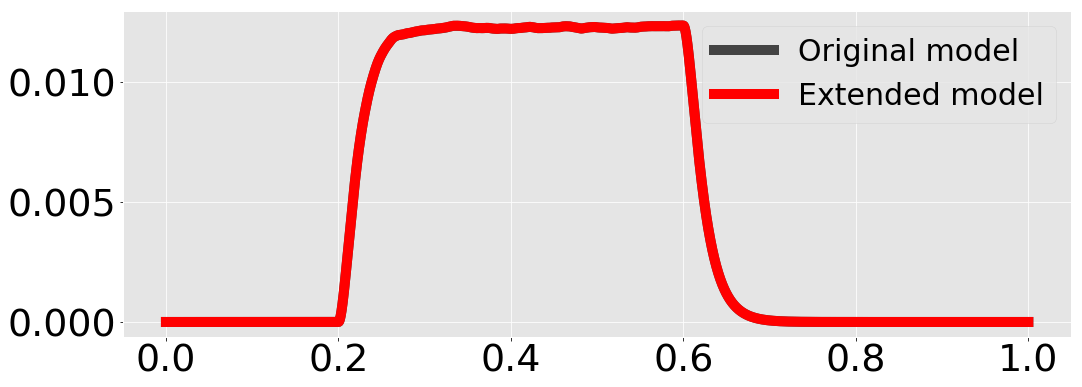

In [4]:
fig, axes = plt.subplots(figsize=(17,6))

axes = th_base.plot_population_states([0], create_plot=False, axes=axes)
axes = th.plot_population_states([0], create_plot=False, axes=axes)

steps = np.arange(0, simulation_steps+1)
#axes.fill_between(steps, -0.08, -0.06, where=(steps > 2001) * (steps < 6001), color="blue", alpha=0.3)
axes.get_lines()[0].set_color("black")
axes.get_lines()[1].set_color("red")
axes.get_lines()[0].set_alpha(0.7)
axes.set_xticklabels(['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
#axes.set_yticklabels(['-5', '-5', '0', '5', '10'])
axes.set_xlabel('')
axes.set_ylabel('')
plt.legend(['Original model', 'Extended model', 'Input period'])

/home/raid2/rgast/anaconda3/envs/mne_gpc/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


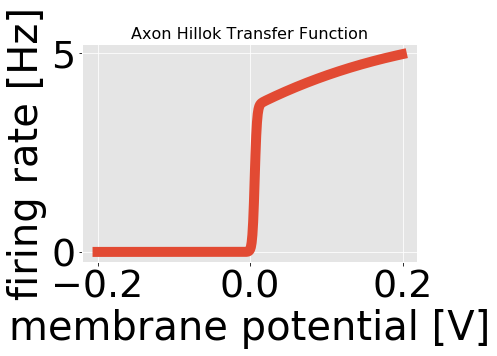

In [3]:
th_base.populations[0].axon.plot_transfer_function(np.arange(-0.2, 0.2, 0.001))